# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats
from lib.plots.data import (DataPlotType, stack)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations

In [2]:
nsample = 10000

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample)

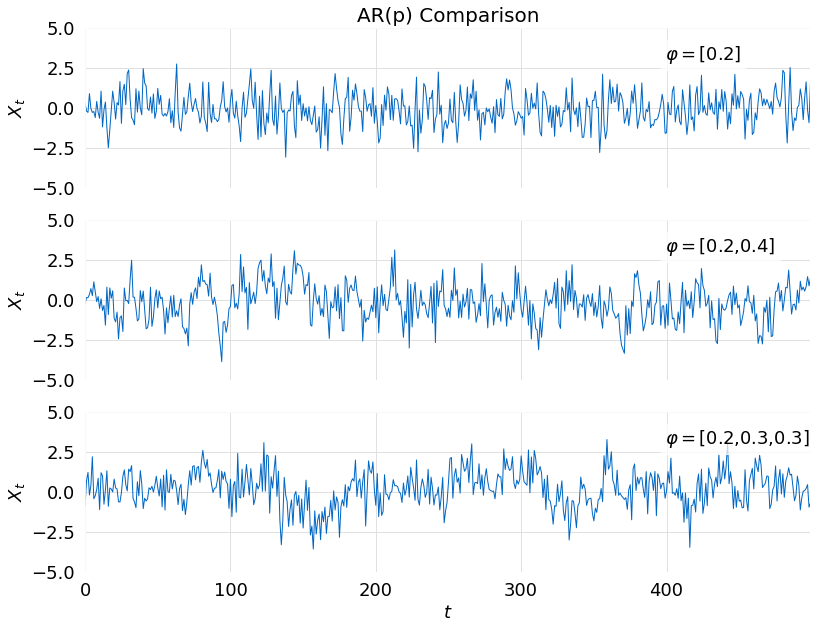

In [3]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
stack(samples, ylim=[-5.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example ($\varphi = 0.2$)

In [4]:
arima.yw(ar1, 1)

array([0.19160761])

In [5]:
result = arima.ar_fit(ar1, 1)
result.polynomial_ar, result.bse

(array([ 1.       , -0.1916009]), array([0.01248204, 0.00987661, 0.01436981]))

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14280.074
Date:                Thu, 14 Apr 2022   AIC                          28566.147
Time:                        21:41:23   BIC                          28587.778
Sample:                             0   HQIC                         28573.469
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.012     -0.193      0.847      -0.027       0.022
ar.L1          0.1916      0.010     19.399      0.000       0.172       0.211
sigma2         1.0182      0.014     70.858      0.000       0.990       1.046
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.79   Prob(JB):                         0.98
Heteroskedasticity (H):               0.91   Skew:                            -0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [7]:
arima.yw(ar2, 2)

array([0.21060525, 0.39056316])

In [8]:
result = arima.ar_fit(ar2, 2)
result.polynomial_ar, result.bse

(array([ 1.        , -0.21059964, -0.39051424]),
 array([0.02499777, 0.00912454, 0.00911233, 0.01411742]))

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -14158.860
Date:                Thu, 14 Apr 2022   AIC                          28325.720
Time:                        21:41:24   BIC                          28354.561
Sample:                             0   HQIC                         28335.482
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0099      0.025     -0.396      0.692      -0.059       0.039
ar.L1          0.2106      0.009     23.081      0.000       0.193       0.228
ar.L2          0.3905      0.009     42.856      0.000       0.373       0.408
sigma2         0.9939      0.014     70.400      0.000       0.966       1.022
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.73   Prob(JB):                         0.72
Heteroskedasticity (H):               0.96   Skew:                             0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [10]:
arima.yw(ar3, 3)

array([0.2010925 , 0.29120531, 0.30016444])

In [11]:
result = arima.ar_fit(ar3, 3)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20101839, -0.29112361, -0.3002091 ]),
 array([0.04812813, 0.0095082 , 0.00938504, 0.00946086, 0.01414238]))

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -14179.662
Date:                Thu, 14 Apr 2022   AIC                          28369.325
Time:                        21:41:24   BIC                          28405.376
Sample:                             0   HQIC                         28381.528
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0649      0.048      1.349      0.177      -0.029       0.159
ar.L1          0.2010      0.010     21.142      0.000       0.182       0.220
ar.L2          0.2911      0.009     31.020      0.000       0.273       0.310
ar.L3          0.3002      0.009     31.732      0.000       0.282       0.319
sigma2         0.9980      0.014     70.565      0.000       0.970       1.026
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.73   Prob(JB):                         0.08
Heteroskedasticity (H):               1.00   Skew:                            -0.05
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Simulations $\sigma = 5.0$

In [13]:
nsample = 10000
σ = 5.0

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample, σ)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample, σ)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample, σ)

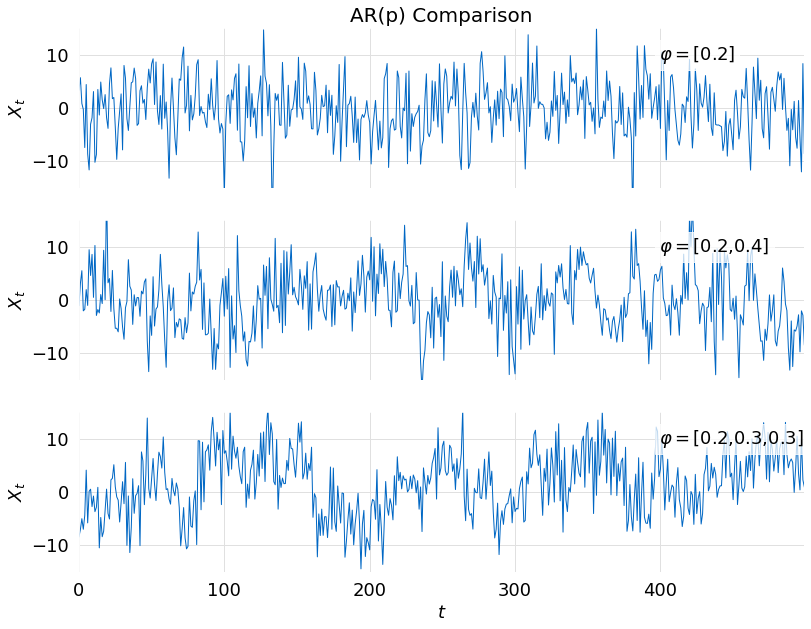

In [14]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
stack(samples, ylim=[-15.0, 15.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

### AR(1) Example ($\varphi = 0.2$)

In [15]:
arima.yw(ar1, 1)

array([0.20625255])

In [16]:
result = arima.ar_fit(ar1, 1)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20626208]),
 array([0.06355006, 0.00975746, 0.3607893 ]))

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -30371.366
Date:                Thu, 14 Apr 2022   AIC                          60748.732
Time:                        21:41:25   BIC                          60770.363
Sample:                             0   HQIC                         60756.054
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0161      0.064     -0.254      0.800      -0.141       0.108
ar.L1          0.2063      0.010     21.139      0.000       0.187       0.225
sigma2        25.4429      0.361     70.520      0.000      24.736      26.150
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.75   Prob(JB):                         0.98
Heteroskedasticity (H):               1.00   Skew:                             0.00
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [18]:
arima.yw(ar2, 2)

array([0.19297412, 0.39865257])

In [19]:
result = arima.ar_fit(ar2, 2)
result.polynomial_ar, result.bse

(array([ 1.        , -0.19297889, -0.39860118]),
 array([0.12260273, 0.00920133, 0.00911724, 0.35321776]))

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -30293.828
Date:                Thu, 14 Apr 2022   AIC                          60595.656
Time:                        21:41:25   BIC                          60624.497
Sample:                             0   HQIC                         60605.418
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1750      0.123     -1.428      0.153      -0.415       0.065
ar.L1          0.1930      0.009     20.973      0.000       0.175       0.211
ar.L2          0.3986      0.009     43.719      0.000       0.381       0.416
sigma2        25.0527      0.353     70.927      0.000      24.360      25.745
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.70   Prob(JB):                         0.93
Heteroskedasticity (H):               0.96   Skew:                            -0.01
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [21]:
arima.yw(ar3, 3)

array([0.19097837, 0.30056459, 0.30148018])

In [22]:
result = arima.ar_fit(ar3, 3)
result.polynomial_ar, result.bse

(array([ 1.        , -0.19089496, -0.30068499, -0.3016449 ]),
 array([0.2391015 , 0.0093335 , 0.00925133, 0.00943356, 0.35392882]))

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -30181.500
Date:                Thu, 14 Apr 2022   AIC                          60373.001
Time:                        21:41:26   BIC                          60409.053
Sample:                             0   HQIC                         60385.204
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2281      0.239      0.954      0.340      -0.241       0.697
ar.L1          0.1909      0.009     20.453      0.000       0.173       0.209
ar.L2          0.3007      0.009     32.502      0.000       0.283       0.319
ar.L3          0.3016      0.009     31.976      0.000       0.283       0.320
sigma2        24.4924      0.354     69.201      0.000      23.799      25.186
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.65
Prob(Q):                              1.00   Prob(JB):                         0.27
Heteroskedasticity (H):               0.98   Skew:                            -0.01
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""